In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Praveen\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:, 2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [6]:
df.shape

(400, 3)

In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(367, 3)

In [10]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Outlier

In [11]:
# Age Column
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

4.75
70.75


In [12]:
# EstimatedSalary Column
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-26000.0
158000.0


There is no outlier in two columns 'Age' and 'EstimatedSalary'.

### EDA

In [13]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.167771,0.626164
EstimatedSalary,0.167771,1.000000,0.375624
Purchased,0.626164,0.375624,1.000000


Text(0, 0.5, 'EstimatedSalary')

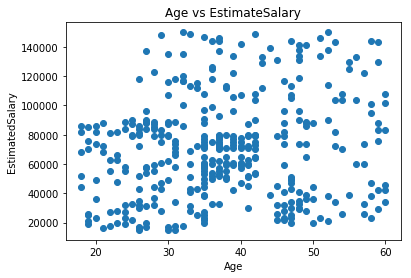

In [14]:
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title('Age vs EstimateSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

There is no Linear relationship between 'Age' and 'EstimatedSalary'. So, we have to use both the columns for the model.

In [15]:
# Seperating as Features and Target
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[ 2.21938166e-02, -3.14033535e-01],
       [ 8.54461939e-01,  1.00486561e+00],
       [ 2.07142288e-01, -3.71376976e-01],
       [-2.55228891e-01, -1.43223063e+00],
       [ 1.03941041e+00,  2.03704755e+00],
       [-6.25125834e-01,  1.16042272e-01],
       [ 1.14668052e-01,  1.83634550e+00],
       [-9.95022777e-01, -1.43223063e+00],
       [ 3.92090760e-01,  1.35539042e-03],
       [ 9.46936175e-01, -1.05949827e+00],
       [-8.10074306e-01, -2.56690094e-01],
       [-7.02804192e-02,  1.16042272e-01],
       [-1.62754655e-01,  1.37759797e+00],
       [ 6.69513467e-01, -7.15437622e-01],
       [ 2.99616524e-01,  4.88774639e-01],
       [ 2.99616524e-01, -5.43407299e-01],
       [-1.62754655e-01, -4.57392138e-01],
       [-1.08749701e+00,  2.88072595e-01],
       [-1.62754655e-01, -1.99346653e-01],
       [-2.55228891e-01, -4.86063858e-01],
       [ 7.61987703e-01, -8.30124504e-01],
       [-9.95022777e-01, -4.57392138e-01],
       [ 1.50178159e+00,  9.76193887e-01],
       [ 9.

**Fitting Random Forest to the Training set**

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 100, 500],
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

from sklearn.model_selection import GridSearchCV
grid_rf_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'max_depth': [170, 180, 190, 200, 210, 220],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [19]:
grid_rf_search.best_estimator_

RandomForestClassifier(max_depth=200, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=10)

In [20]:
grid_rf_search.score(x_train, y_train)

0.9309090909090909

In [21]:
grid_rf_search.score(x_test, y_test)

0.8804347826086957

**Predicting the Test set results**

In [22]:
# Predicting a new result
print(grid_rf_search.predict(sc.transform([[22, 75520]])))

[0]


In [23]:
# Predicting test set results
y_pred = grid_rf_search.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]]


**Making the Confusion Matrix**

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  6]
 [ 5 29]]


**Visualising the Training set results**

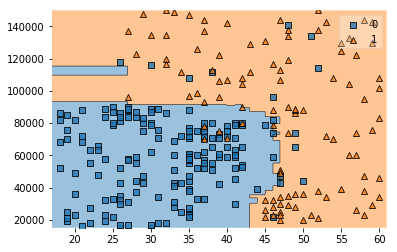

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, grid_rf_search)

**Visualising the Test set results**

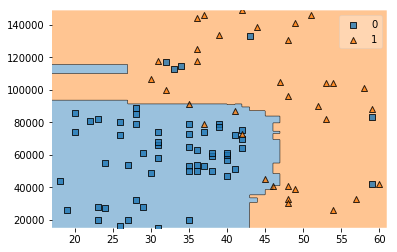

In [26]:
plot_decision_regions(x_test, y_test, clf=grid_rf_search)